In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
ptrain= "/kaggle/input/dataresponsiii/train_features.csv"
ptest = "/kaggle/input/dataresponsi/test_features.csv"

dftr = pd.read_csv(ptrain, index_col=0)
dfte = pd.read_csv(ptest, index_col=0)

pd.read_csv("/kaggle/input/dataresponsi/submission_format.csv")

,ID,damage_grade
0,71840,5
1,85155,5
2,287066,5
3,124951,5
4,73581,5
...,...,...
77498,238185,5
77499,290899,5
77500,184490,5
77501,342028,5


In [13]:
display(dftr.info(), dftr.describe(include="object"))

<class 'pandas.core.frame.DataFrame'>
Index: 310009 entries, 5054 to 212492
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        282223 non-null  object 
 1   old_building                    307150 non-null  float64
 2   plinth_area (ft^2)              240977 non-null  object 
 3   height_before_eq (ft)           282223 non-null  float64
 4   land_surface_condition          292578 non-null  object 
 5   type_of_foundation              307150 non-null  object 
 6   type_of_roof                    240977 non-null  object 
 7   type_of_ground_floor            282223 non-null  object 
 8   type_of_other_floor             292578 non-null  object 
 9   position                        289075 non-null  object 
 10  building_plan_configuration     292578 non-null  object 
 11  technical_solution_proposed     37406 non-null   object 
 12  legal_ownership_st

None

,floors_before_eq (total),plinth_area (ft^2),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,residential_type,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure
count,282223,240977,292578,307150,240977,282223,292578,289075,292578,37406,309806,299882,310009,309909,304469,309981
unique,47,930,3,12,12,15,11,4,10,4,13,6,13,9,3,2
top,Floor two,300 ft^2,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,Rectangular,Reconstruction,Private,Non-residential,Non-public,Non-industrial,Non-govermental,unavailable
freq,16019,8756,242249,125447,63815,189692,153919,228796,280701,23029,161397,285275,309270,285667,304383,283731


In [14]:
display(dftr.head(), dfte.head())

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
ID,,,,,,,,,,,,,,,,,,,,,
5054,Floor 3,26.0,300 ft^2,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
166563,There is 2 Floor/Story,16.0,263 ft^2,18.0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/TImber-Light Roof,mud,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
25330,Floor two,5.0,NaN,10.0,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,mud,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,2
60282,NaN,27.0,NaN,NaN,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,NaN,TImber/Bamboo-Mud,NaN,...,0.0,Hotel/Motel,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
194414,1,6.0,380 ft^2,6.0,Moderate slope,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Not applicable,Attached-2 side,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
ID,,,,,,,,,,,,,,,,,,,,,
71840,floor third,20.0,374 ft^2,21.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,Attached-2 side,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
85155,Floor two,26.0,364 ft^2,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
287066,NaN,6.0,NaN,NaN,NaN,Clay mortar-Stone/Brick,NaN,NaN,NaN,NaN,...,1.0,0.0,Non-residential,1.0,Non-public,Infrastructure,Non-govermental,unavailable,5.0,2.0
124951,There is 2 Floor/Story,25.0,345 ft^2,12.0,Moderate slope,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,Wood-Plank,Not attached,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
73581,Three,25.0,324 ft^2,14.0,Moderate slope,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Mud,Lumber-plank,Not attached,...,0.0,0.0,Non-residential,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0


In [15]:
dfte.columns

Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'legal_ownership_status',
       'has_secondary_use', 'type_of_reinforcement_concrete',
       'residential_type', 'no_family_residing', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure', 'wall_binding', 'wall_material'],
      dtype='object')

<Axes: >

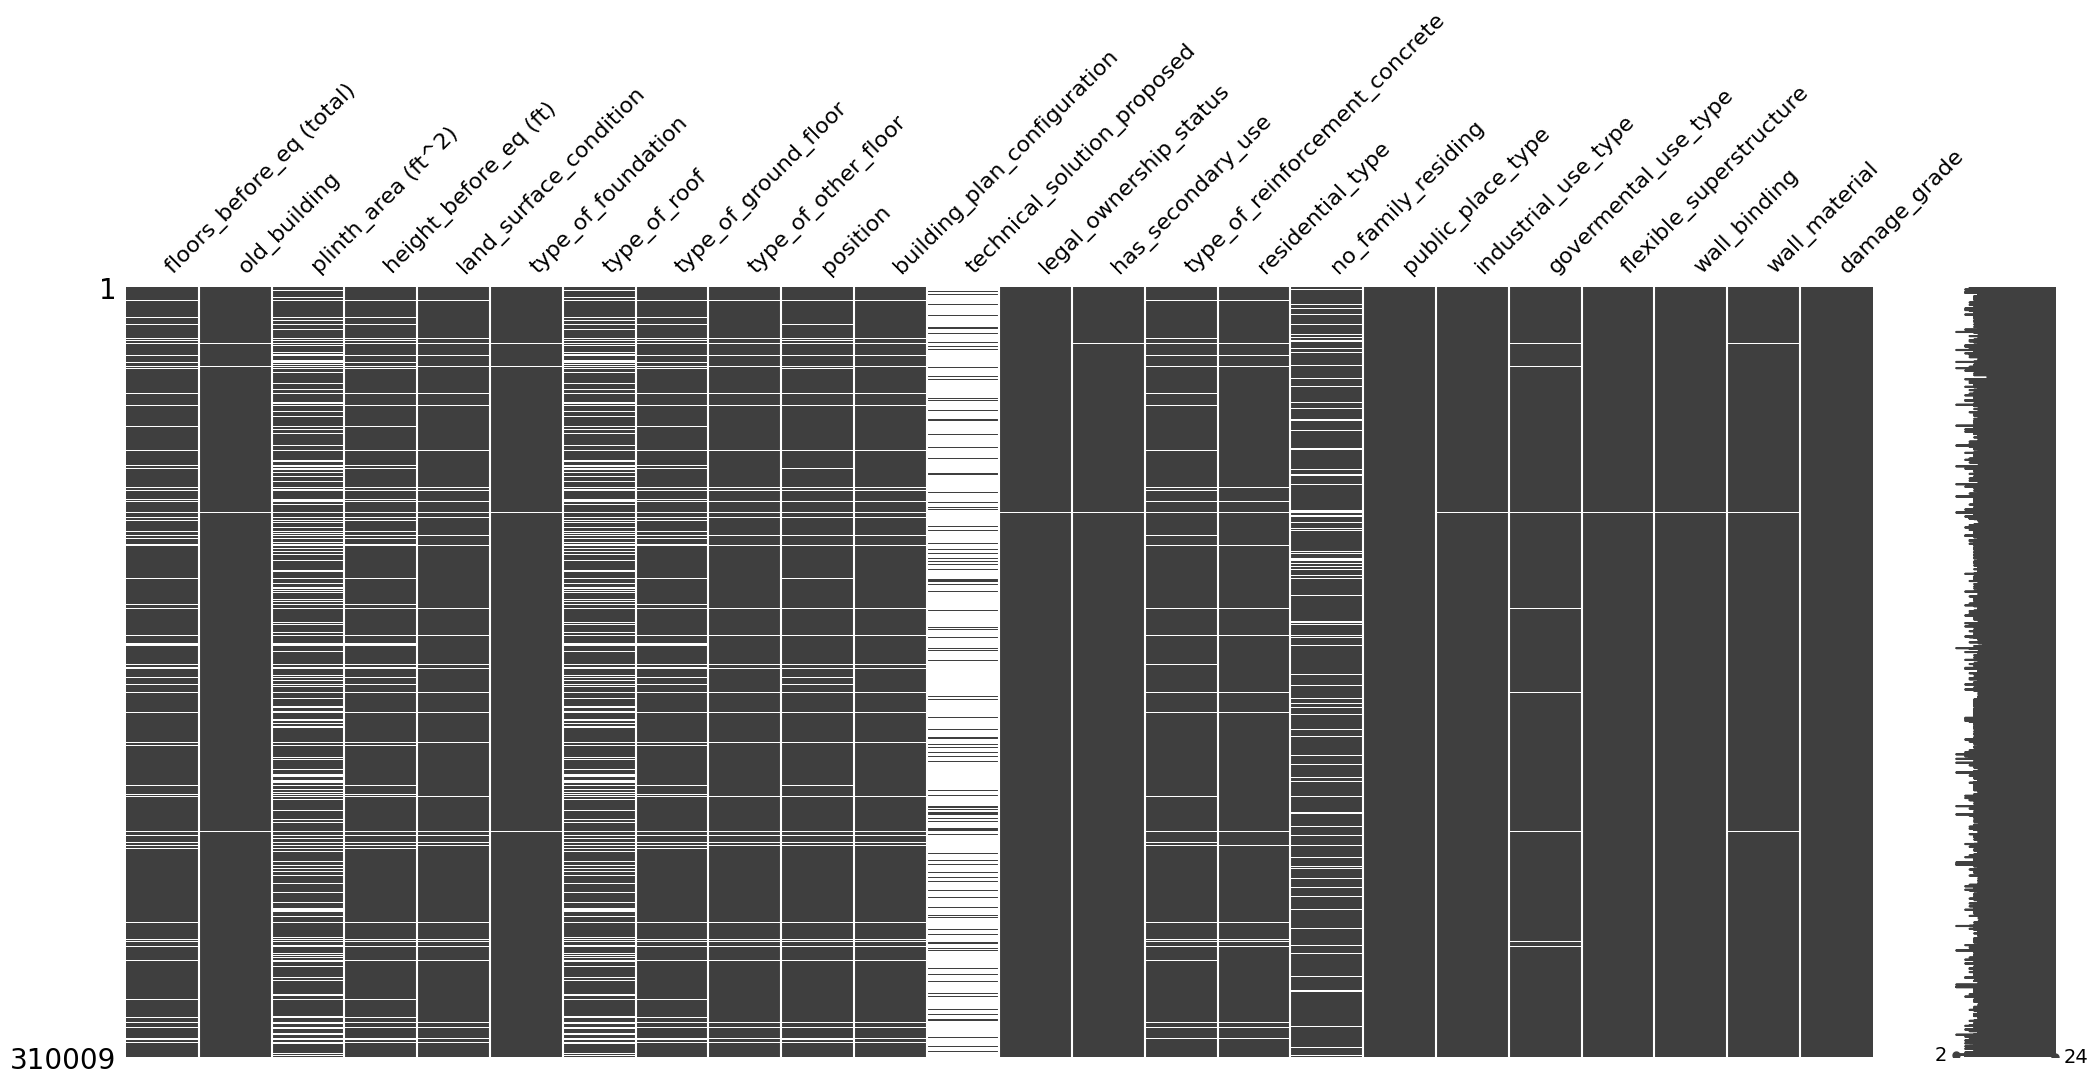

In [16]:
msno.matrix(dftr)

In [17]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310009 entries, 5054 to 212492
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        282223 non-null  object 
 1   old_building                    307150 non-null  float64
 2   plinth_area (ft^2)              240977 non-null  object 
 3   height_before_eq (ft)           282223 non-null  float64
 4   land_surface_condition          292578 non-null  object 
 5   type_of_foundation              307150 non-null  object 
 6   type_of_roof                    240977 non-null  object 
 7   type_of_ground_floor            282223 non-null  object 
 8   type_of_other_floor             292578 non-null  object 
 9   position                        289075 non-null  object 
 10  building_plan_configuration     292578 non-null  object 
 11  technical_solution_proposed     37406 non-null   object 
 12  legal_ownership_st

In [44]:
df1.describe()

,floors,old,plinth,height,land,roof,position,has_secondary_use,type_of_reinforcement_concrete,no_family_residing,wall_binding,wall_material,damage_grade
count,282223.0,307150.000000,240977.000000,282223.000000,292578.000000,240977.000000,289075.000000,308620.0,295248.0,279243.0,309981.0,307736.0,309981.000000
mean,2.086279,24.495667,398.270544,16.043218,0.205183,0.395926,0.247756,0.12783,0.073047,1.087483,4.231379,1.7297,3.615157
std,0.656218,66.207343,183.725505,5.520064,0.478969,0.596249,0.517947,0.333901,0.320298,0.349594,1.701756,0.656351,1.350258
min,1.0,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.000000
25%,2.0,8.000000,280.000000,12.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,5.0,2.0,3.000000
50%,2.0,16.000000,358.000000,16.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,5.0,2.0,4.000000
75%,2.0,27.000000,470.000000,18.000000,0.000000,1.000000,0.000000,0.0,0.0,1.0,5.0,2.0,5.000000
max,9.0,999.000000,1000.000000,99.000000,2.000000,2.000000,3.000000,1.0,3.0,11.0,7.0,3.0,5.000000


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309981 entries, 5054 to 212492
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors                          282223 non-null  Int64  
 1   old                             307150 non-null  float64
 2   plinth                          240977 non-null  float64
 3   height                          282223 non-null  float64
 4   land                            292578 non-null  float64
 5   foundation                      307150 non-null  object 
 6   roof                            240977 non-null  float64
 7   ground_floor                    282223 non-null  object 
 8   other_floor                     292578 non-null  object 
 9   position                        289075 non-null  float64
 10  building_plan_configuration     292578 non-null  object 
 11  technical_solution_proposed     37406 non-null   object 
 12  legal_ownership_st

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
ptrain= "/kaggle/input/dataresponsiii/train_features.csv"
ptest = "/kaggle/input/dataresponsi/test_features.csv"

dftr = pd.read_csv(ptrain, index_col=0)
dfte = pd.read_csv(ptest, index_col=0)

pd.read_csv("/kaggle/input/dataresponsi/submission_format.csv")

,ID,damage_grade
0,71840,5
1,85155,5
2,287066,5
3,124951,5
4,73581,5
...,...,...
77498,238185,5
77499,290899,5
77500,184490,5
77501,342028,5


In [19]:
# df1 and dfte
uji = dfte.copy()
df1 = dftr.drop_duplicates().copy()
df1.iloc[:,1:].duplicated().sum() # 130k

df1.dropna(thresh=4, inplace=True)

# rename kolom
df1.columns = [j.split("_")[0] for j in df1.columns[0:5]]+[j.split("of_")[1] for j in df1.columns[5:9]]+list(df1.columns[9:])
uji.columns = [j.split("_")[0] for j in uji.columns[0:5]]+[j.split("of_")[1] for j in uji.columns[5:9]]+list(uji.columns[9:])

# plinth
df1.plinth = df1.plinth.str.split(" ",expand=True)[0]
df1.loc[df1["plinth"]=="More", "plinth"] = 1000
df1.plinth = df1.plinth.astype("float")

uji.plinth = uji.plinth.str.split(" ",expand=True)[0]
uji.loc[uji["plinth"]=="More", "plinth"] = 1000
uji.plinth = uji.plinth.astype("float")

#labelling
uji.floors.replace(df1.floors.value_counts().index,
                   11*[2]+8*[3]+9*[1]+8*[4]+[6]+6*[5]+[7,8,9,5], inplace=True)
df1.floors.replace(df1.floors.value_counts().index,
                   11*[2]+8*[3]+9*[1]+8*[4]+[6]+6*[5]+[7,8,9,5], inplace=True)

uji.foundation.replace(df1.foundation.value_counts().index,
                       "Cl Cl Cl Cb Bt Bt Rc Rc Bt Cb Ot Ot".split(), inplace=True)
uji.roof.replace(df1.roof.value_counts().index, 
                 "Li He Li Li Li Rc He He Rc Rc He Rc".split(), inplace=True)
uji.ground_floor.replace(df1.ground_floor.value_counts().index, 
                         "Cl Cl Bs Rc Cl Rc Cl Rc Bs Wo Bs Ot Wo Wo Wo".split(), inplace=True)
uji.other_floor.replace(df1.other_floor.value_counts().index, 
                        "Cl No Pl Pl Cl Rc Cl Pl Cl Rc Rc".split(), inplace=True)

df1.foundation.replace(df1.foundation.value_counts().index,
                       "Cl Cl Cl Cb Bt Bt Rc Rc Bt Cb Ot Ot".split(), inplace=True)
df1.roof.replace(df1.roof.value_counts().index, 
                 "Li He Li Li Li Rc He He Rc Rc He Rc".split(), inplace=True)
df1.ground_floor.replace(df1.ground_floor.value_counts().index, 
                         "Cl Cl Bs Rc Cl Rc Cl Rc Bs Wo Bs Ot Wo Wo Wo".split(), inplace=True)
df1.other_floor.replace(df1.other_floor.value_counts().index, 
                        "Cl No Pl Pl Cl Rc Cl Pl Cl Rc Rc".split(), inplace=True)

uji.legal_ownership_status.replace(df1.legal_ownership_status.value_counts().index,
                                   "Pr Pr Pr Pr Pu Pu Pu In In In Ot Ot Ot".split(), inplace=True)
uji.residential_type.replace(df1.residential_type.value_counts().index, 
                             "Nr Hm Rr Ho Ot Ot".split(), inplace=True)

df1.legal_ownership_status.replace(df1.legal_ownership_status.value_counts().index,
                       "Pr Pr Pr Pr Pu Pu Pu In In In Ot Ot Ot".split(), inplace=True)
df1.residential_type.replace(df1.residential_type.value_counts().index, 
                             "Nr Hm Rr Ho Ot Ot".split(), inplace=True)

# no family residing
uji.loc[uji["no_family_residing"]=="None", "no_family_residing"] = 0
df1.loc[df1["no_family_residing"]=="None", "no_family_residing"] = 0

uji["no_family_residing"] = uji["no_family_residing"].astype("float")
df1["no_family_residing"] = df1["no_family_residing"].astype("float")

# public: Np, Ss, Rs, Hc, Sc, Sc, Hc, Sc, Sc, Ot, Ot, Hc, Ot 
uji.public_place_type.replace(df1.public_place_type.value_counts().index,
                              "Np, Ss, Hc, Rs, Hc, Sc, Ot, Sc, Sc, Sc, Hc, Ot, Ot".split(", "), inplace=True)
df1.public_place_type.replace(df1.public_place_type.value_counts().index,
                              "Np, Ss, Hc, Rs, Hc, Sc, Ot, Sc, Sc, Sc, Hc, Ot, Ot".split(", "), inplace=True)

# industrial: Ni, Fo, St, Ma, In, Me, Ag, Ag, Ag
uji.industrial_use_type.replace(df1.industrial_use_type.value_counts().index,
                                "Ni Fo St Ma Me In Ag Ag Ag".split(), inplace=True)
df1.industrial_use_type.replace(df1.industrial_use_type.value_counts().index,
                                "Ni Fo St Ma Me In Ag Ag Ag".split(), inplace=True)


# to integer
df1["floors has_secondary_use type_of_reinforcement_concrete no_family_residing wall_binding wall_material damage_grade".split()] = df1["floors has_secondary_use type_of_reinforcement_concrete no_family_residing wall_binding wall_material damage_grade".split()].astype("Int64")
df1["damage_grade"] = df1["damage_grade"].astype(int)

uji["floors has_secondary_use type_of_reinforcement_concrete no_family_residing wall_binding wall_material".split()] = uji["floors has_secondary_use type_of_reinforcement_concrete no_family_residing wall_binding wall_material".split()].astype("Int64")

# to ordinal (land, roof, and position)
uji.land.replace(df1.land.value_counts().index, [0,1,2], inplace=True)
df1.land.replace(df1.land.value_counts().index, [0,1,2], inplace=True)

uji.roof.replace(df1.roof.value_counts().index, [0,1,2], inplace=True)
df1.roof.replace(df1.roof.value_counts().index, [0,1,2], inplace=True)

uji.position.replace(df1.position.value_counts().index, [0,1,2,3], inplace=True)
df1.position.replace(df1.position.value_counts().index, [0,1,2,3], inplace=True)

/tmp/ipykernel_34/4180752542.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uji.floors.replace(df1.floors.value_counts().index,
/tmp/ipykernel_34/4180752542.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  uji.floors.replace(df1.floors.value_counts().index,
/tmp/ipykernel_34/4180752542.py:

In [20]:
df1.dtypes

floors                              Int64
old                               float64
plinth                            float64
height                            float64
land                              float64
foundation                         object
roof                              float64
ground_floor                       object
other_floor                        object
position                          float64
building_plan_configuration        object
technical_solution_proposed        object
legal_ownership_status             object
has_secondary_use                   Int64
type_of_reinforcement_concrete      Int64
residential_type                   object
no_family_residing                  Int64
public_place_type                  object
industrial_use_type                object
govermental_use_type               object
flexible_superstructure            object
wall_binding                        Int64
wall_material                       Int64
damage_grade                      

In [21]:
from sklearn.impute import SimpleImputer
# Memisahkan kolom berdasarkan tipe data
numerical_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Imputer untuk data numerik dengan modus
numerical_imputer = SimpleImputer(strategy='most_frequent')

# Imputer untuk data kategorik dengan modus
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Mengimputasi data
df1[numerical_cols] = numerical_imputer.fit_transform(df1[numerical_cols])
df1[categorical_cols] = categorical_imputer.fit_transform(df1[categorical_cols])

# Mengecek hasil imputasi
print(df1.isna().sum())  # Pastikan tidak ada nilai yang hilang
print(df1)

floors                            0
old                               0
plinth                            0
height                            0
land                              0
foundation                        0
roof                              0
ground_floor                      0
other_floor                       0
position                          0
building_plan_configuration       0
technical_solution_proposed       0
legal_ownership_status            0
has_secondary_use                 0
type_of_reinforcement_concrete    0
residential_type                  0
no_family_residing                0
public_place_type                 0
industrial_use_type               0
govermental_use_type              0
flexible_superstructure           0
wall_binding                      0
wall_material                     0
damage_grade                      0
dtype: int64
        floors   old  plinth  height  land foundation  roof ground_floor  \
ID                                             

In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Misalkan df1 adalah dataframe asli dan uji adalah dataframe yang akan diimputasi
# Memisahkan kolom berdasarkan tipe data
numerical_cols = uji.select_dtypes(include=['number']).columns
categorical_cols = uji.select_dtypes(include=['object']).columns

# Imputer untuk data numerik dengan mean dari df1
numerical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer.fit(df1[numerical_cols])  # Fit imputer pada data df1

# Imputer untuk data kategorik dengan modus dari df1
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer.fit(df1[categorical_cols])  # Fit imputer pada data df1

# Mengimputasi data uji
uji[numerical_cols] = numerical_imputer.transform(uji[numerical_cols])
uji[categorical_cols] = categorical_imputer.transform(uji[categorical_cols])

# Mengecek hasil imputasi
print(uji.isna().sum())  # Pastikan tidak ada nilai yang hilang
print(uji)

floors                            0
old                               0
plinth                            0
height                            0
land                              0
foundation                        0
roof                              0
ground_floor                      0
other_floor                       0
position                          0
building_plan_configuration       0
technical_solution_proposed       0
legal_ownership_status            0
has_secondary_use                 0
type_of_reinforcement_concrete    0
residential_type                  0
no_family_residing                0
public_place_type                 0
industrial_use_type               0
govermental_use_type              0
flexible_superstructure           0
wall_binding                      0
wall_material                     0
dtype: int64
        floors   old  plinth  height  land foundation  roof ground_floor  \
ID                                                                         
71840  

In [23]:
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df1.to_csv("df1fiksbanget.csv")
uji.to_csv("ujifiksbanget.csv")

In [25]:
p1 = "/kaggle/working/df1fiksbanget.csv"
p2 = "/kaggle/working/ujifiksbanget.csv"

df1 = pd.read_csv(p1, index_col=0)
uji0 = pd.read_csv(p2, index_col=0)

Train = pd.read_csv("/kaggle/input/dataresponsiii/train_features.csv", index_col=0)
Test = pd.read_csv("/kaggle/input/dataresponsi/test_features.csv", index_col=0)

In [26]:
df1

,floors,old,plinth,height,land,foundation,roof,ground_floor,other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
ID,,,,,,,,,,,,,,,,,,,,,
5054,3.0,26.0,300.0,16.0,0.0,Cl,1.0,Cl,Cl,0.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,5.0
166563,2.0,16.0,263.0,18.0,1.0,Cl,0.0,Cl,Cl,0.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,5.0
25330,2.0,5.0,300.0,10.0,0.0,Cl,0.0,Cl,Pl,0.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,2.0
60282,2.0,27.0,300.0,18.0,0.0,Cl,0.0,Cl,Cl,0.0,...,0.0,Hm,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,5.0
194414,1.0,6.0,380.0,6.0,1.0,Cl,0.0,Cl,No,2.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253891,2.0,6.0,192.0,14.0,0.0,Cl,1.0,Cl,Rc,2.0,...,0.0,Hm,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,4.0
4279,2.0,50.0,310.0,22.0,0.0,Cl,1.0,Cl,Cl,0.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,5.0
352159,3.0,22.0,528.0,18.0,0.0,Cl,0.0,Cl,Cl,0.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,5.0


In [27]:
uji0

,floors,old,plinth,height,land,foundation,roof,ground_floor,other_floor,position,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
ID,,,,,,,,,,,,,,,,,,,,,
71840,3.0,20.0,374.0,21.0,0.0,Cl,0.0,Cl,Cl,2.0,...,0.0,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0
85155,2.0,26.0,364.0,16.0,0.0,Cl,0.0,Cl,Cl,0.0,...,0.0,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0
287066,2.0,6.0,300.0,18.0,0.0,Cl,0.0,Cl,Cl,0.0,...,1.0,0.0,Nr,1.0,Np,Me,Non-govermental,unavailable,5.0,2.0
124951,2.0,25.0,345.0,12.0,1.0,Cl,0.0,Cl,Pl,0.0,...,0.0,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0
73581,3.0,25.0,324.0,14.0,1.0,Cl,1.0,Cl,Pl,0.0,...,0.0,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238185,2.0,17.0,300.0,15.0,1.0,Cl,0.0,Cl,Cl,0.0,...,0.0,0.0,Nr,1.0,Np,Ni,Non-govermental,available,5.0,2.0
290899,1.0,3.0,90.0,7.0,0.0,Cl,0.0,Cl,No,0.0,...,0.0,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0
184490,3.0,15.0,395.0,18.0,0.0,Cl,0.0,Cl,Cl,0.0,...,0.0,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0


# EDA

In [15]:
df1fiks = pd.read_csv("/kaggle/working/df1fiksbanget.csv", index_col=0)

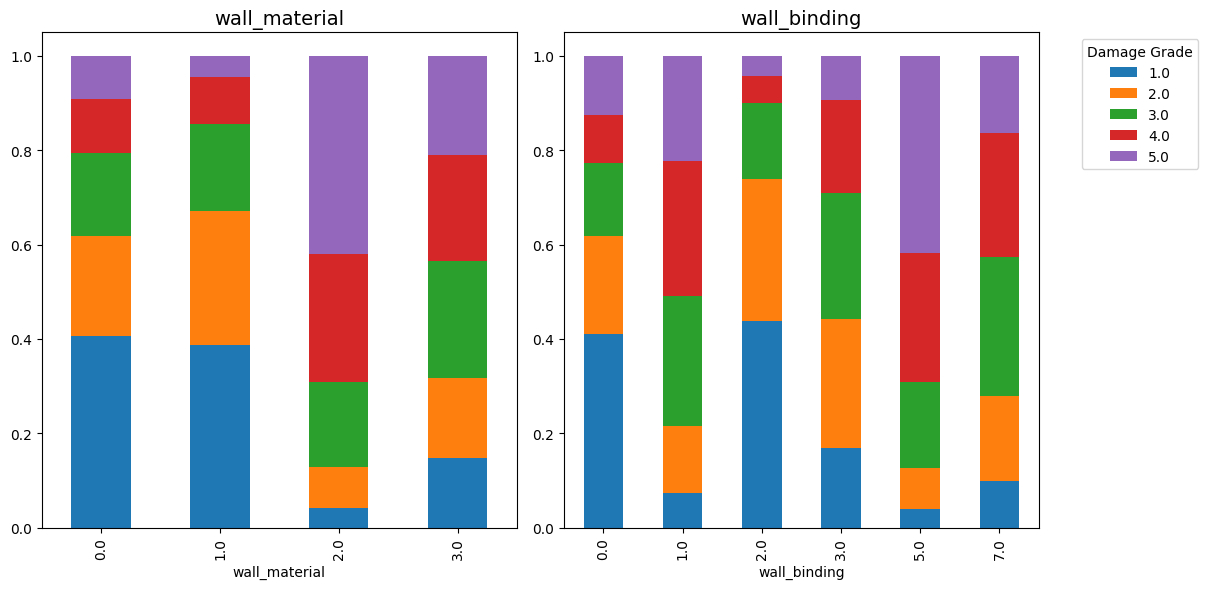

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat daftar untuk menyimpan crosstab
dataframes = []

# Membuat crosstab tanpa fillna
dataframes.append(pd.crosstab(df1fiks["wall_material"], df1fiks['damage_grade'], normalize="index"))
dataframes.append(pd.crosstab(df1fiks["wall_binding"], df1fiks['damage_grade'], normalize="index"))

# Mengatur plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting
for i, ax in enumerate(axes):
    dataframes[i].plot(kind="bar", stacked=True, legend=False, ax=ax)
    ax.set_title(dataframes[i].index.name, fontsize=14)

# Menambahkan legenda pada subplot terakhir
axes[-1].legend(title="Damage Grade", loc='upper right', bbox_to_anchor=(1.35, 1))

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


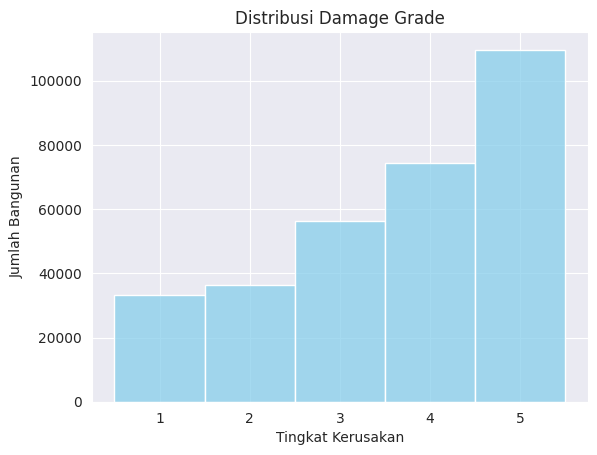

In [19]:
sns.set_style('darkgrid')
sns.histplot(data=df1fiks, x='damage_grade', kde=False, bins=5, color='skyblue')
plt.title('Distribusi Damage Grade')
plt.xlabel('Tingkat Kerusakan')
plt.ylabel('Jumlah Bangunan')
plt.xticks([1.4, 2.2, 3, 3.8, 4.6], ['1', '2', '3', '4', '5'])
# filename = '/kaggle/working/label.png'
# plt.savefig(filename)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxenplot
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

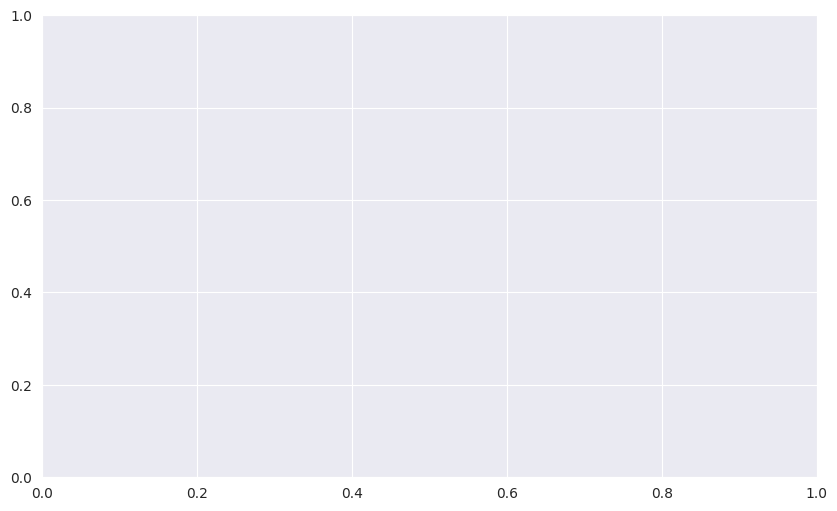

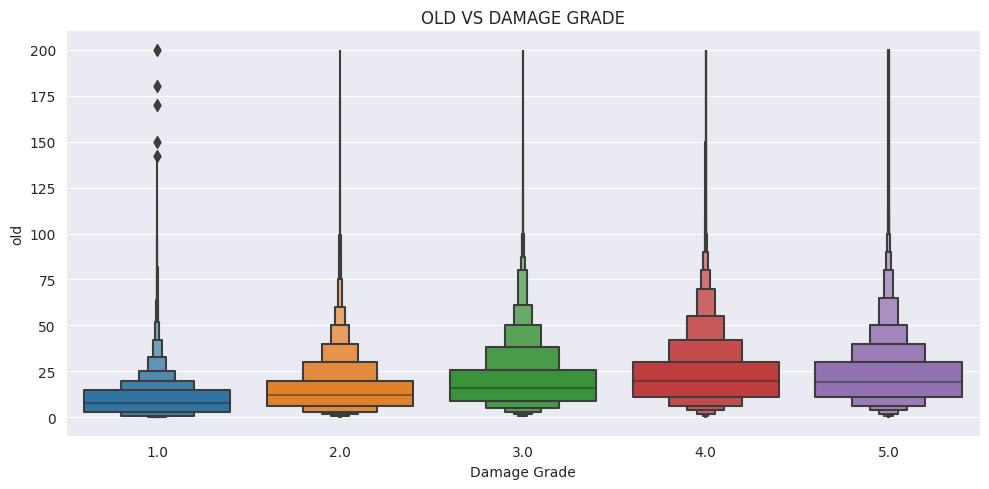

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxenplot
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

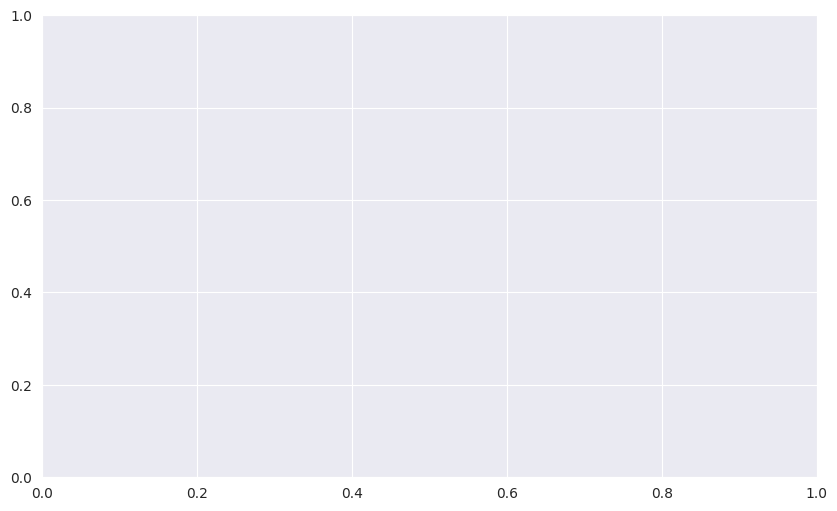

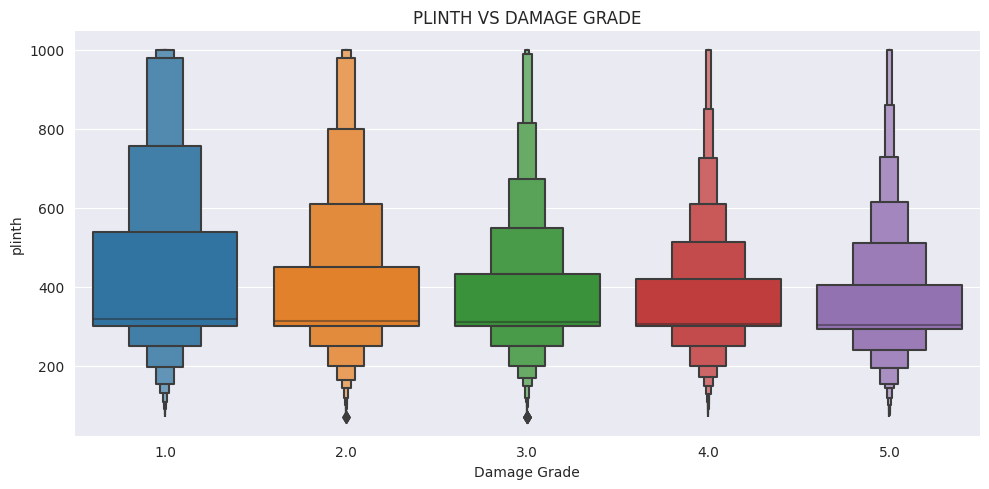

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxenplot
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

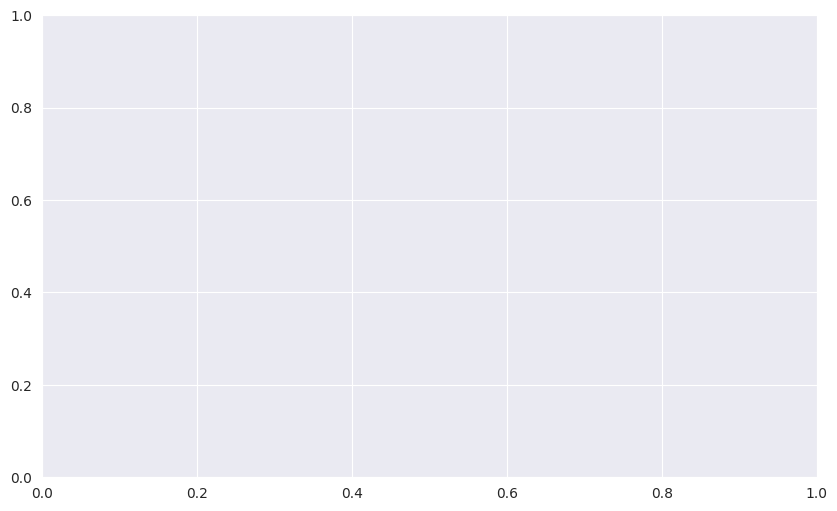

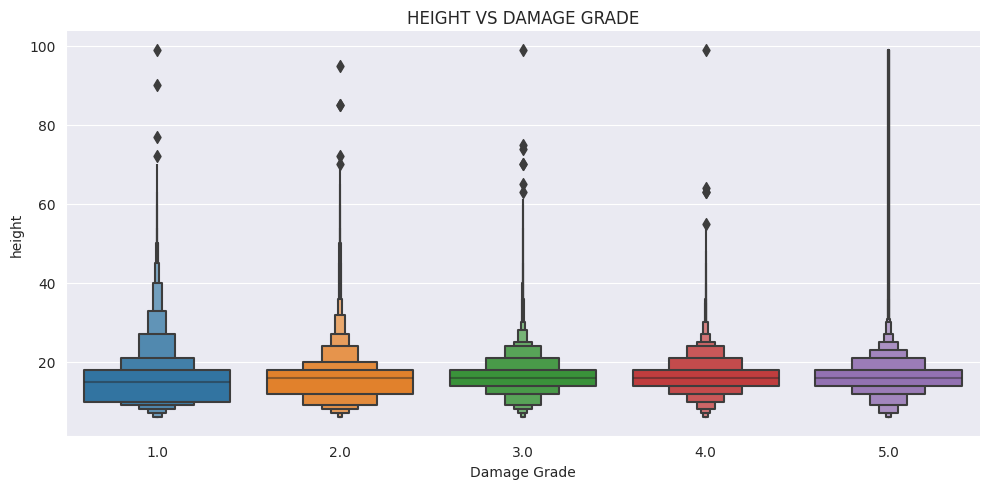

In [20]:
kol_num = ["old", "plinth", "height"]
for k in kol_num:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.catplot(x="damage_grade", y=k, data=df1fiks[df1fiks.old<999], kind="boxen", ax=ax, height=5, aspect=2)
    plt.title(k.upper() + " VS DAMAGE GRADE")
    plt.xlabel('Damage Grade')
    plt.ylabel(k)
    plt.tight_layout()
    plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import  CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score, auc, roc_auc_score
from sklearn.metrics import f1_score, balanced_accuracy_score, fbeta_score, precision_recall_curve, roc_curve
from sklearn.impute import KNNImputer, SimpleImputer
from category_encoders import LeaveOneOutEncoder, OrdinalEncoder, MEstimateEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn import set_config

In [31]:
X1 = df1.dropna()
uji = uji0.copy()

X1["P1"] = X1.groupby("technical_solution_proposed")["height"].transform("median")
uji["P1"] = uji.groupby("technical_solution_proposed")["height"].transform("median")

y1 = X1.pop("damage_grade")

display(X1.head(2), y1.head())

,floors,old,plinth,height,land,foundation,roof,ground_floor,other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,P1
ID,,,,,,,,,,,,,,,,,,,,,
5054,3.0,26.0,300.0,16.0,0.0,Cl,1.0,Cl,Cl,0.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,16.0
166563,2.0,16.0,263.0,18.0,1.0,Cl,0.0,Cl,Cl,0.0,...,0.0,Nr,1.0,Np,Ni,Non-govermental,unavailable,5.0,2.0,16.0


ID
5054      5.0
166563    5.0
25330     2.0
60282     5.0
194414    4.0
Name: damage_grade, dtype: float64

In [32]:
## Split for Choosing the best method
X1tr, X1te, y1tr, y1te = train_test_split(X1, y1, test_size=0.4, 
                                          stratify=y1, random_state=0)
## Kolom things
kat_kol = X1.select_dtypes("object").columns
num_kol = "old plinth height".split()
rem_kol = list(set(X1tr.columns)-set(kat_kol)-set(num_kol))
display(kat_kol, num_kol, rem_kol)

kat_trf1= Pipeline(steps=[("kat_en", OrdinalEncoder())])

num_trf1 = Pipeline(steps=[("num_sc", StandardScaler())])

rem_trf1 = Pipeline(steps=[("rem_im", SimpleImputer(strategy="most_frequent"))])

## Merge preprocessing
pre_1 = ColumnTransformer(transformers=[('kat', kat_trf1, kat_kol), 
                                        ("num", num_trf1, num_kol),
                                        ("rem", rem_trf1, rem_kol)])

## Modelling
pipa_RF1 = imbpipeline(steps=[("preprocess", pre_1),
                              ("clf", RandomForestClassifier(random_state=0, class_weight="balanced"))])
pipa_SVC = imbpipeline(steps=[("preprocess", pre_1),
                              ("clf", LinearSVC(random_state=0, dual=False, max_iter=1000, C=1e3))])


## Cross Val.
kFold = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=0)

Index(['foundation', 'ground_floor', 'other_floor',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure'],
      dtype='object')

['old', 'plinth', 'height']

['land',
 'wall_binding',
 'floors',
 'position',
 'no_family_residing',
 'has_secondary_use',
 'wall_material',
 'roof',
 'type_of_reinforcement_concrete',
 'P1']

In [25]:
pipa_RF1.fit(X1, y1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('kat',
                                                  Pipeline(steps=[('kat_en',
                                                                   OrdinalEncoder())]),
                                                  Index(['foundation', 'ground_floor', 'other_floor',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superst...
                                                  Pipeline(steps=[('num_sc',
                                                                   StandardScaler())]),
                                                  ['old', 'plinth', 'height']),
                                                 ('rem',
                                                  Pipeline(steps=[('rem_im',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['floors', 'P1', 'position',
                                                   'type_of_reinforcement_concrete',
                                                   'wall_binding',
                                                   'no_family_residing', 'land',
                                                   'wall_material',
                                                   'has_secondary_use',
                                                   'roof'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=0))])

In [26]:
print(classification_report(y1te, pipa_RF1.predict(X1te)))

              precision    recall  f1-score   support

         1.0       0.89      0.94      0.91      9979
         2.0       0.81      0.90      0.85     10932
         3.0       0.83      0.87      0.85     16884
         4.0       0.87      0.86      0.87     22303
         5.0       0.93      0.87      0.90     32897

    accuracy                           0.88     92995
   macro avg       0.87      0.89      0.88     92995
weighted avg       0.88      0.88      0.88     92995



In [27]:
pipa_SVC.fit(X1, y1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('kat',
                                                  Pipeline(steps=[('kat_en',
                                                                   OrdinalEncoder())]),
                                                  Index(['foundation', 'ground_floor', 'other_floor',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superst...
                                                  Pipeline(steps=[('num_sc',
                                                                   StandardScaler())]),
                                                  ['old', 'plinth', 'height']),
                                                 ('rem',
                                                  Pipeline(steps=[('rem_im',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['floors', 'P1', 'position',
                                                   'type_of_reinforcement_concrete',
                                                   'wall_binding',
                                                   'no_family_residing', 'land',
                                                   'wall_material',
                                                   'has_secondary_use',
                                                   'roof'])])),
                ('clf', LinearSVC(C=1000.0, dual=False, random_state=0))])

In [28]:
print(classification_report(y1te, pipa_SVC.predict(X1te)))

              precision    recall  f1-score   support

         1.0       0.45      0.63      0.53      9979
         2.0       0.70      0.10      0.17     10932
         3.0       0.66      0.10      0.17     16884
         4.0       0.33      0.04      0.08     22303
         5.0       0.43      0.94      0.59     32897

    accuracy                           0.44     92995
   macro avg       0.51      0.36      0.31     92995
weighted avg       0.48      0.44      0.34     92995



In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Menambahkan model tambahan
pipa_KNN = imbpipeline(steps=[("preprocess", pre_1),
                              ("clf", KNeighborsClassifier(n_neighbors=5))])

pipa_GB = imbpipeline(steps=[("preprocess", pre_1),
                             ("clf", GradientBoostingClassifier(random_state=0))])

In [35]:
pipa_KNN.fit(X1, y1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('kat',
                                                  Pipeline(steps=[('kat_en',
                                                                   OrdinalEncoder())]),
                                                  Index(['foundation', 'ground_floor', 'other_floor',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superst...
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('num_sc',
                                                                   StandardScaler())]),
                                                  ['old', 'plinth', 'height']),
                                                 ('rem',
                                                  Pipeline(steps=[('rem_im',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['floors', 'P1', 'position',
                                                   'type_of_reinforcement_concrete',
                                                   'wall_binding',
                                                   'no_family_residing', 'land',
                                                   'wall_material',
                                                   'has_secondary_use',
                                                   'roof'])])),
                ('clf', KNeighborsClassifier())])

In [36]:
print(classification_report(y1te, pipa_KNN.predict(X1te)))

              precision    recall  f1-score   support

         1.0       0.58      0.70      0.64      9979
         2.0       0.51      0.43      0.47     10932
         3.0       0.50      0.48      0.49     16884
         4.0       0.52      0.52      0.52     22303
         5.0       0.66      0.67      0.66     32897

    accuracy                           0.57     92995
   macro avg       0.55      0.56      0.55     92995
weighted avg       0.57      0.57      0.57     92995



In [37]:
pipa_GB.fit(X1, y1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('kat',
                                                  Pipeline(steps=[('kat_en',
                                                                   OrdinalEncoder())]),
                                                  Index(['foundation', 'ground_floor', 'other_floor',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superst...
                                                  Pipeline(steps=[('num_sc',
                                                                   StandardScaler())]),
                                                  ['old', 'plinth', 'height']),
                                                 ('rem',
                                                  Pipeline(steps=[('rem_im',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['floors', 'P1', 'position',
                                                   'type_of_reinforcement_concrete',
                                                   'wall_binding',
                                                   'no_family_residing', 'land',
                                                   'wall_material',
                                                   'has_secondary_use',
                                                   'roof'])])),
                ('clf', GradientBoostingClassifier(random_state=0))])

In [38]:
print(classification_report(y1te, pipa_GB.predict(X1te)))

              precision    recall  f1-score   support

         1.0       0.53      0.63      0.58      9979
         2.0       0.50      0.15      0.24     10932
         3.0       0.50      0.14      0.22     16884
         4.0       0.35      0.11      0.17     22303
         5.0       0.46      0.92      0.61     32897

    accuracy                           0.46     92995
   macro avg       0.47      0.39      0.36     92995
weighted avg       0.45      0.46      0.39     92995



# Model Terbaik

In [15]:
fin_RF1 = imbpipeline(steps=[("preprocess", pre_1),
                             ("clf", RandomForestClassifier(class_weight='balanced', max_depth=25,
                                                            max_features='sqrt', min_samples_leaf=4,
                                                            min_samples_split=10, n_estimators=900,
                                                            random_state=0))])
fin_RF1.fit(X1, y1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('kat',
                                                  Pipeline(steps=[('kat_en',
                                                                   OrdinalEncoder())]),
                                                  Index(['foundation', 'ground_floor', 'other_floor',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superst...
                                                  Pipeline(steps=[('rem_im',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['wall_binding', 'floors',
                                                   'position', 'land',
                                                   'no_family_residing',
                                                   'type_of_reinforcement_concrete',
                                                   'roof', 'wall_material',
                                                   'P1',
                                                   'has_secondary_use'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=25,
                                        min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=900,
                                        random_state=0))])

In [16]:
print(classification_report(y1te, fin_RF1.predict(X1te)))

              precision    recall  f1-score   support

         1.0       0.57      0.75      0.65     13305
         2.0       0.51      0.37      0.43     14576
         3.0       0.52      0.34      0.41     22512
         4.0       0.43      0.49      0.46     29737
         5.0       0.59      0.64      0.61     43863

    accuracy                           0.53    123993
   macro avg       0.52      0.52      0.51    123993
weighted avg       0.53      0.53      0.52    123993



<Axes: >

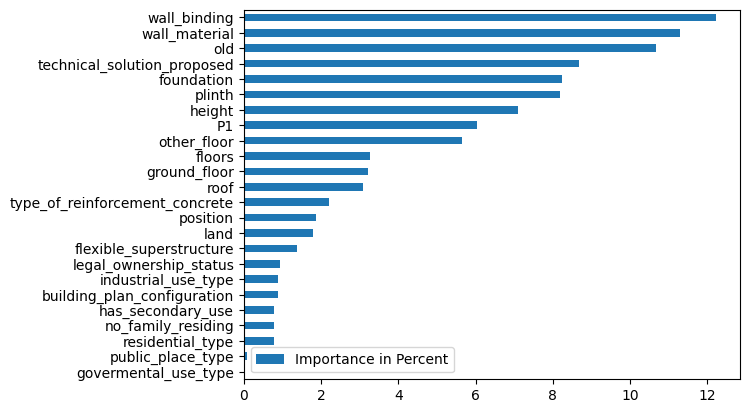

In [17]:
mm = pd.DataFrame(100*fin_RF1.steps[-1][1].feature_importances_, index=list(kat_kol)+list(num_kol)+list(rem_kol), 
                  columns=["Importance in Percent"])
mm.sort_values("Importance in Percent").plot(kind="barh")

In [39]:
fin_out = pd.DataFrame({"ID": uji.index,
                       "damage_grade": fin_RF1.predict(uji).astype("int")})

display(fin_out.head())
fin_out.to_csv("submitfiks.csv", index=False)

,ID,damage_grade
0,71840,5
1,85155,4
2,287066,4
3,124951,4
4,73581,5


In [ ]:
knn_out = pd.DataFrame({"ID": uji.index,
                       "damage_grade": pipa_KNN.predict(uji).astype("int")})

display(knn_out.head())
knn_out.to_csv("submitknn.csv", index=False)

,ID,damage_grade
0,71840,5
1,85155,4
2,287066,4
3,124951,4
4,73581,5
